In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
!pip install cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.img_transform as ctransform
data_crs = ccrs.PlateCarree()
from matplotlib.patches import Polygon
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap, Normalize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 36.5 MB/s eta 0:00:00


In [ ]:
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
totals = {'N': 40, 'W of ML': 305, 'Cross ML': 173, 'SW' : 135, 'SE' : 35, 'NE' : 9}

In [ ]:
def ADIZ_heatmap(totals):
  fig = plt.figure(figsize=(8,8))
  ax = plt.axes(projection = ccrs.PlateCarree(central_longitude=120.))
  ax.coastlines()
  ax.set_extent([117.,123.,21.,29.])
  plt.draw()
  gl = ax.gridlines(draw_labels=True)
  gl.right_labels = False
  gl.top_labels = False
  gl.left_labels = False
  gl.bottom_labels = False


  plt.rcParams['font.family'] = 'sans-serif'
  plt.rcParams['font.sans-serif'] = ['Arial'] + plt.rcParams['font.sans-serif']

  cmap = plt.get_cmap('YlOrRd', 400)
  colorsarray = []
  colorsdict = {'N': 0, 'W of ML': 0, 'Cross ML': 0, 'SW' : 0, 'SE' : 0, 'NE' : 0}
  for key in colorsdict.keys():
    colorsdict[key] = cmap(totals[key])
  norm = Normalize(vmin=0, vmax=400, clip=False)
  bar = fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax,
                     pad = 0.125, shrink = 0.7, anchor = (0.0,0.0), aspect = 8)

  ax.plot([117.5,117.5],[21.0,29.0], transform = data_crs, color = 'r', linewidth = 2)
  ax.plot([117.5,123.0],[28.98,28.98], transform = data_crs, color = 'r', linewidth = 2)
  ax.plot([117.5,121.5],[21.02,21.02], transform = data_crs, color = 'r', linewidth = 2)
  ax.plot([121.5,123.0],[21.0,22.5], transform = data_crs, color = 'r', linewidth = 2)
  ax.plot([122.98,122.98],[22.5,29.0], transform = data_crs, color = 'r', linewidth = 2)
  ax.plot([122.0,123.0],[27.0,27.0], transform = data_crs, color = 'b', linewidth = 2)
  ax.plot([118.0,122.0],[23.0,27.0], transform = data_crs, color = 'b', linewidth = 2)
  ax.plot([117.5,118.0],[22.5,23.0], transform = data_crs, color = 'b', linewidth = 2, linestyle = '--')

  polygon_n = Polygon([(122,28),(122,26),(123,26),(123,28)], transform = data_crs, color = colorsdict['N'])
  polygon_w = Polygon([(122,27),(121.75,27.25),(117.75,23.25),(118,23)], transform = data_crs, color = colorsdict['W of ML'])
  polygon_cross_ml = Polygon([(122,27),(122,26.5),(119,23.5),(120.5,21.5),(122,21.5),(121.5,21),(120,21),(118,23)],
                             transform = data_crs, color = colorsdict['Cross ML'])
  polygon_sw = Polygon([(117.5,22.5),(117.5,21),(120,21),(118,23)], transform = data_crs, color = colorsdict['SW'])
  polygon_se = Polygon([(122.15,24),(122,23.5),(122,21.5),(123,22.5),(123,24)], transform = data_crs, color = colorsdict['SE'])
  polygon_ne = Polygon([(122.5,26),(122.5,25),(122.15,24),(123,24),(123,26)], transform = data_crs, color = colorsdict['NE'])

  plt.text(122.35, 27.4, str(totals['N']), dict(size=13, weight = 'roman'), transform = data_crs)
  plt.text(120.5, 26.1, str(totals['W of ML']), dict(size=13, weight = 'roman'), transform = data_crs)
  plt.text(118.5, 23.1, str(totals['Cross ML']), dict(size=13, weight = 'roman'), transform = data_crs)
  plt.text(118.28, 21.4, str(totals['SW']), dict(size=13, weight = 'roman'), transform = data_crs)
  plt.text(122.35, 22.4, str(totals['SE']), dict(size=13, weight = 'roman'), transform = data_crs)
  plt.text(122.7, 24.1, str(totals['NE']), dict(size=13, weight = 'roman'), transform = data_crs)


  ax.add_patch(polygon_n)
  ax.add_patch(polygon_w)
  ax.add_patch(polygon_cross_ml)
  ax.add_patch(polygon_sw)
  ax.add_patch(polygon_se)
  ax.add_patch(polygon_ne)

  plt.savefig('/content/gdrive/MyDrive/Taiwan ADIZ heatmap.png', dpi = 600)

/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


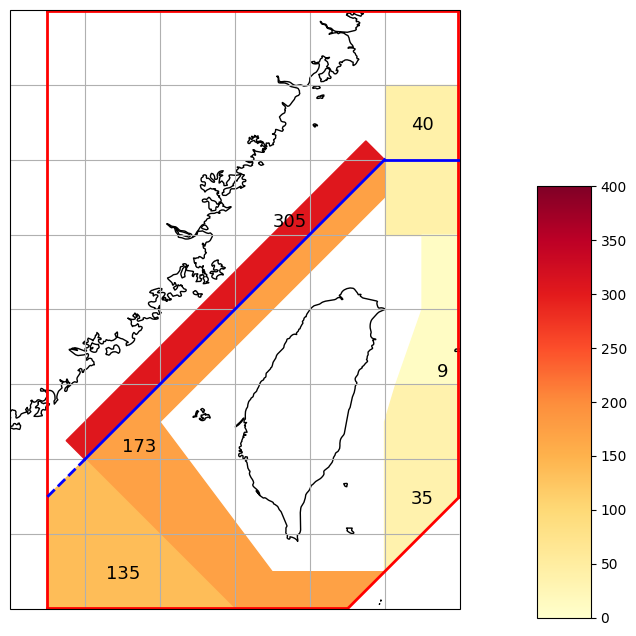

In [ ]:
ADIZ_heatmap(totals)